# Import Libraries
- Put all the important libraries together at the beginning to improve the readability, performance, and maintainability of the code

In [34]:
import pandas as pd # data processing, like pd.read_csv()
import numpy as np # linear algebra
import warnings# to make all the coding result more readable, ignnore the warning information
warnings.filterwarnings('ignore')
#import matplot and seaborn to draw the figures
import matplotlib.pyplot as plt
import seaborn as sns
# to scaler the attributes, import the StandardScaler to process
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

# Get the Data

In [35]:
from pathlib import Path
customer=pd.read_csv(Path('CustomerDataset.csv'))# use .read_csv() method to get the whole data

# Exploratory data analysis

## Dataset Dimensions

In [36]:
customer.shape # check the dataset, there are 200 instances and 5 attributes

(200, 5)

## Preview the dataset

In [37]:
customer.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Female,29,499,85
1,2,Female,21,208,81
2,3,Female,27,300,48
3,4,Female,26,458,29
4,5,Male,57,221,4


## View summary of the dataset

In [38]:
customer.info() # use the info() method check the data statistical information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Findings**
  - there are 5 columns, data size is 200, 4 numerical variables and 1 character variables 
  - Gender is object

## View the statistical variables of dataset

In [39]:
customer.describe()

,CustomerID,Age,Income,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,39.075000,393.630000,50.475000
std,57.879185,14.042626,170.715441,25.765065
min,1.000000,16.000000,93.000000,1.000000
25%,50.750000,29.000000,270.500000,32.750000
50%,100.500000,36.500000,399.500000,50.000000
75%,150.250000,49.000000,501.250000,72.250000
max,200.000000,74.000000,896.000000,99.000000


**Findings**
  - As for the statistical data values, their value ranges vary too much, need to standadize or normalize.
  - CustomerID: There are 200 customers
  - Age: Age of customers are ranging from 16 to 74
  - Income: Income ranges from 93 to 896
  - SpendingScore: SpendingScore ranges from 1 to 99

# Data Cleaning

## Check the missing values

In [40]:
customer.isnull().any()
# result shows that there is no null value

CustomerID       False
Gender           False
Age              False
Income           False
SpendingScore    False
dtype: bool

- Result shows that there is no null value

## Check the duplicated Values

In [41]:
customer.duplicated().sum()

0

**Findings**
  - There is no missing and duplicated rows

# Explore the Categorical Variables

## Distribution of Categorical Variables

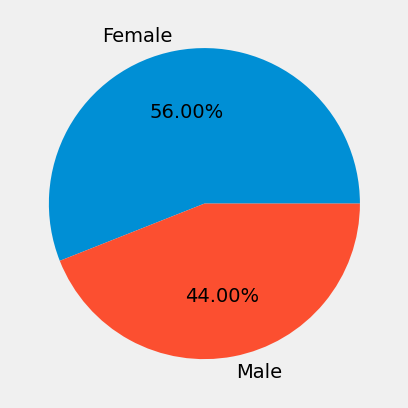

In [42]:
# To visualize the distribution of Categorical Variables, use pie chart to show it
plt.pie(customer['Gender'].value_counts(), labels=customer['Gender'].value_counts().index.tolist(), autopct='%.2f%%')
plt.show()

**Finding**
  - **Gender**: 'Female' accounts for 56%, 'Male' accounts for 44%
  - In this e-commerce company, there are more females shopping than males

# Explore Numerical Variables

In [43]:
numerical=[col for col in customer.columns if customer[col].dtype!='O']
customer[numerical].head() #preview the numerical variables

,CustomerID,Age,Income,SpendingScore
0,1,29,499,85
1,2,21,208,81
2,3,27,300,48
3,4,26,458,29
4,5,57,221,4


## One Attribute Distribution Analysis

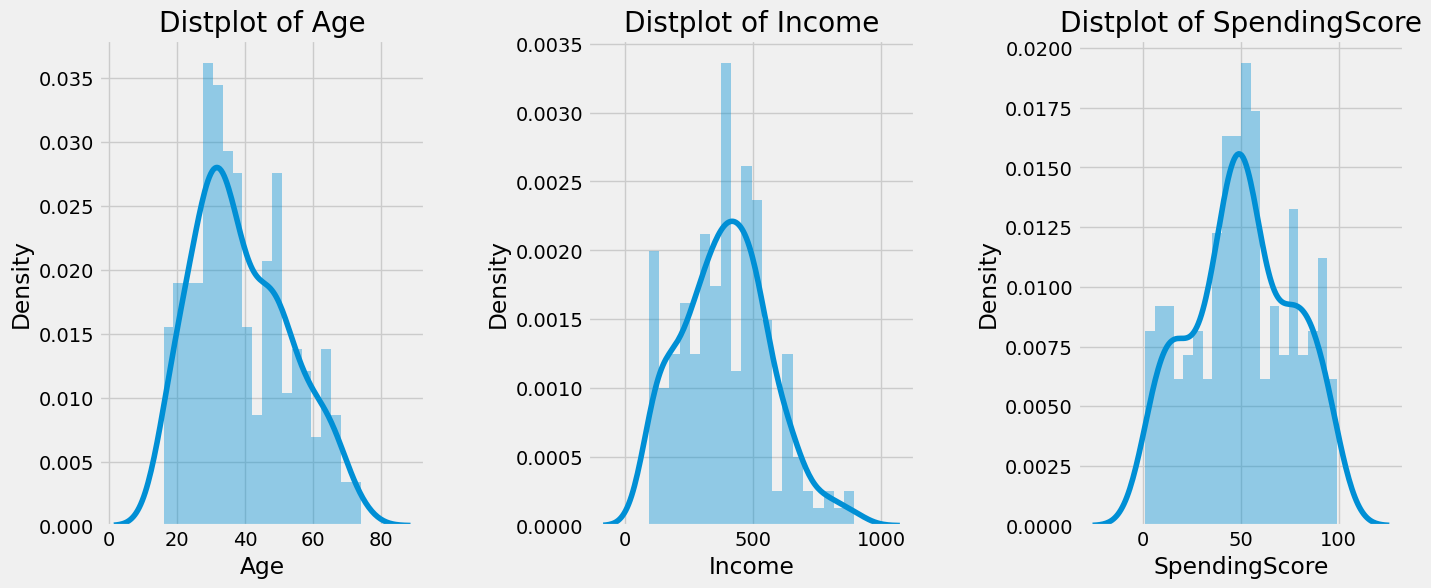

In [44]:
# Check the Distribution
plt.style.use('fivethirtyeight')
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Income' , 'SpendingScore']:      
  n += 1
  plt.subplot(1 , 3 , n)
  plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
  sns.distplot(customer[x] , bins = 20)
  plt.title('Distplot of {}'.format(x))
plt.show()

**Finding**
  - The figure above draws the statistical histogram of the three main attributes in the data. From left to right, it shows the distribution of age, income, and consumption index. The shapes are similar to the normal distribution, indicating that the amount of data is sufficient and the distribution of data sampling is also relatively ideal
  - **'Age':** Customers' Age in the [30,40] range are the most, and there are also many people in the [20,30] range, but the elderly over 60 are the least frequent consumers, and the distribution is irregular in the [40,60] range. It is speculated that there are other factors that affect the consumption of people in this age group
  - **'Income':** Most of the customer income is concentrated in the range of [400,550]
  - **'SpendingScore':** Spending Score is concentrated between [40,55]

## Two Attributes Analysis 

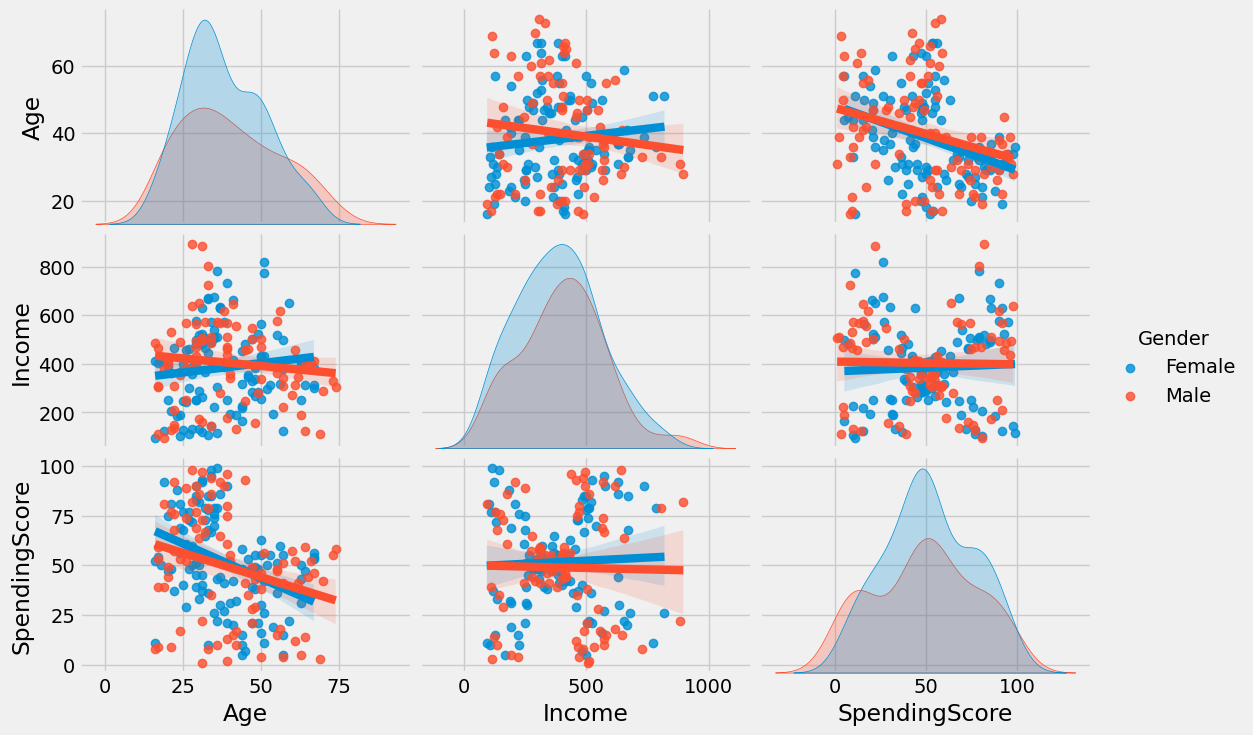

In [45]:
#use pairplot to show the each 2 attributes realtionships
sns.pairplot(customer, vars=['Age', 'Income', 'SpendingScore'], hue='Gender', aspect=1.5, kind='reg')
# define the `kind` parameter to `reg` to fit the scatter plot to a regression line to more intuitively display the relationship between variables
plt.show()

**Finding**
  - In marketing view, the age is the target group for the different marketing intentions
  - `Age` has negatively relations with `SpendingScore`
  - `SpendingScore` has strong relationship with `Income`


### Comparison of purchasing power between men and women

[Text(0.5, 1.0, 'Comparison of purchasing power between men and women')]

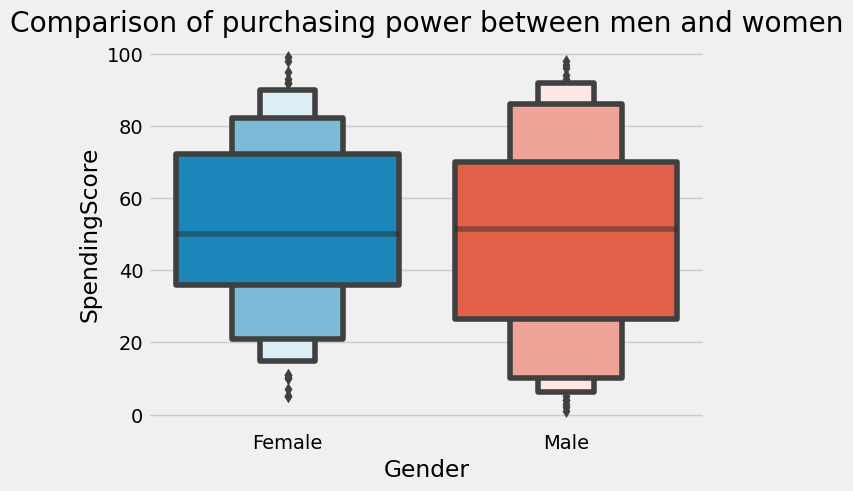

In [46]:
# Draw a vertical enhanced boxplot grouped by categorical variables
sns.boxenplot(x='Gender',y='SpendingScore',data=customer).set(title='Comparison of purchasing power between men and women')

**Finding**
  - Man's Spending Scores are concentrated in [25, 70], while women's Spending Scores are concentrated in [37, 75], which to some extent shows that women perform better than men in purchasing power

## Three Attributes Analysis: Check the attributes relationship with different gender

### Relations of Age with the Income under different genders


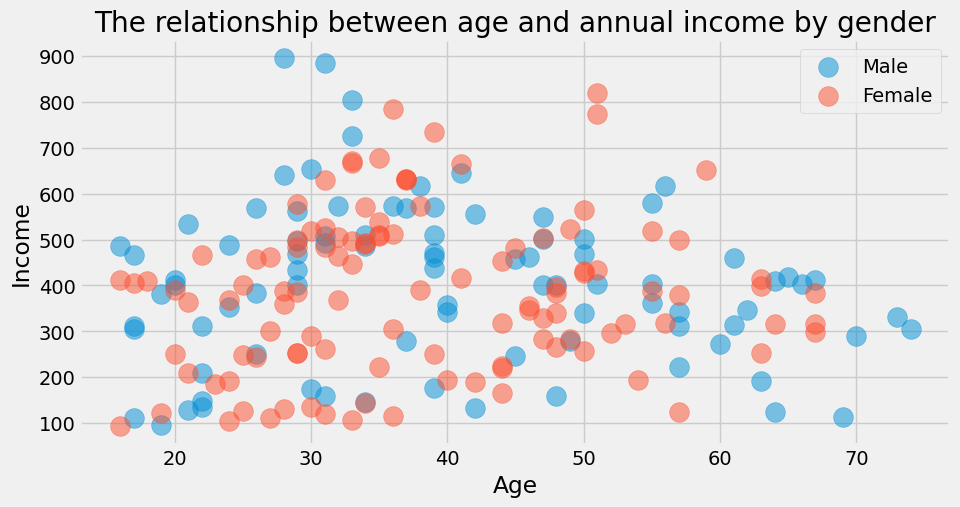

In [47]:
plt.figure(1,figsize=(10,5))
for gender in ['Male','Female']:  
    plt.scatter(x='Age',y='Income',data=customer[customer['Gender']==gender],
               s=200,alpha=0.5,label=gender)
plt.xlabel('Age'),plt.ylabel('Income') 
plt.title('The relationship between age and annual income by gender')
plt.legend() 
plt.show()

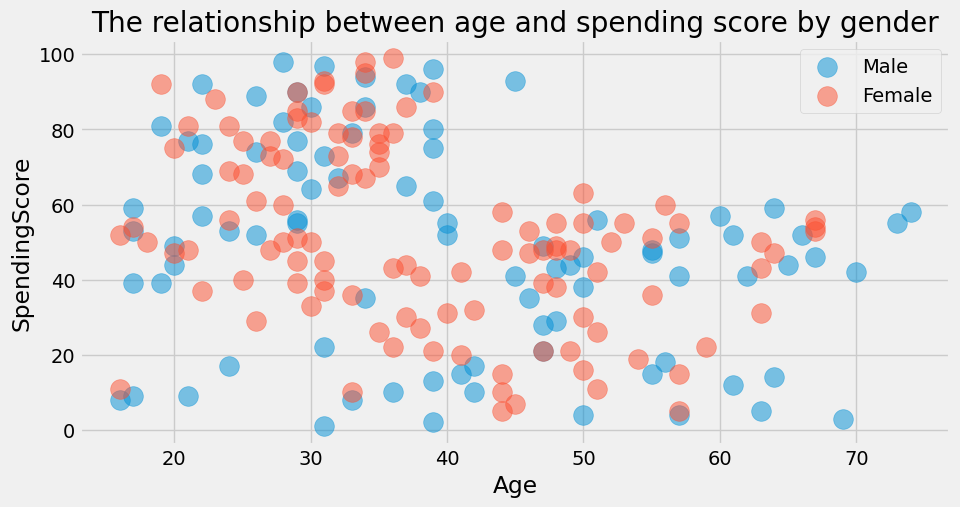

In [48]:
plt.figure(1,figsize=(10,5))
for gender in ['Male','Female']:  
    plt.scatter(x='Age',y='SpendingScore',data=customer[customer['Gender']==gender],
               s=200,alpha=0.5,label=gender)
plt.xlabel('Age'),plt.ylabel('SpendingScore') 
plt.title('The relationship between age and spending score by gender')
plt.legend() 
plt.show()

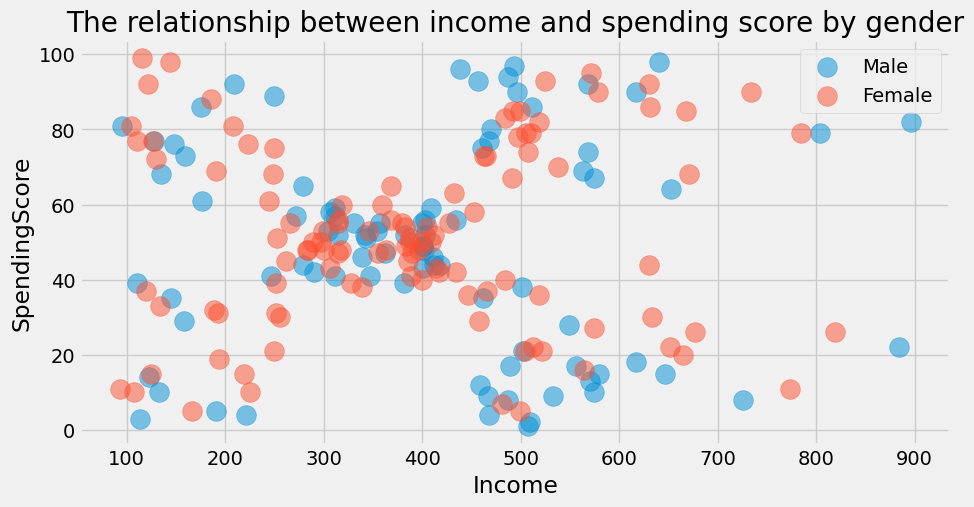

In [49]:
plt.figure(1,figsize=(10,5))
for gender in ['Male','Female']:  
    plt.scatter(x='Income',y='SpendingScore',data=customer[customer['Gender']==gender],
               s=200,alpha=0.5,label=gender)
plt.xlabel('Income'),plt.ylabel('SpendingScore') 
plt.title('The relationship between income and spending score by gender')
plt.legend() 
plt.show()

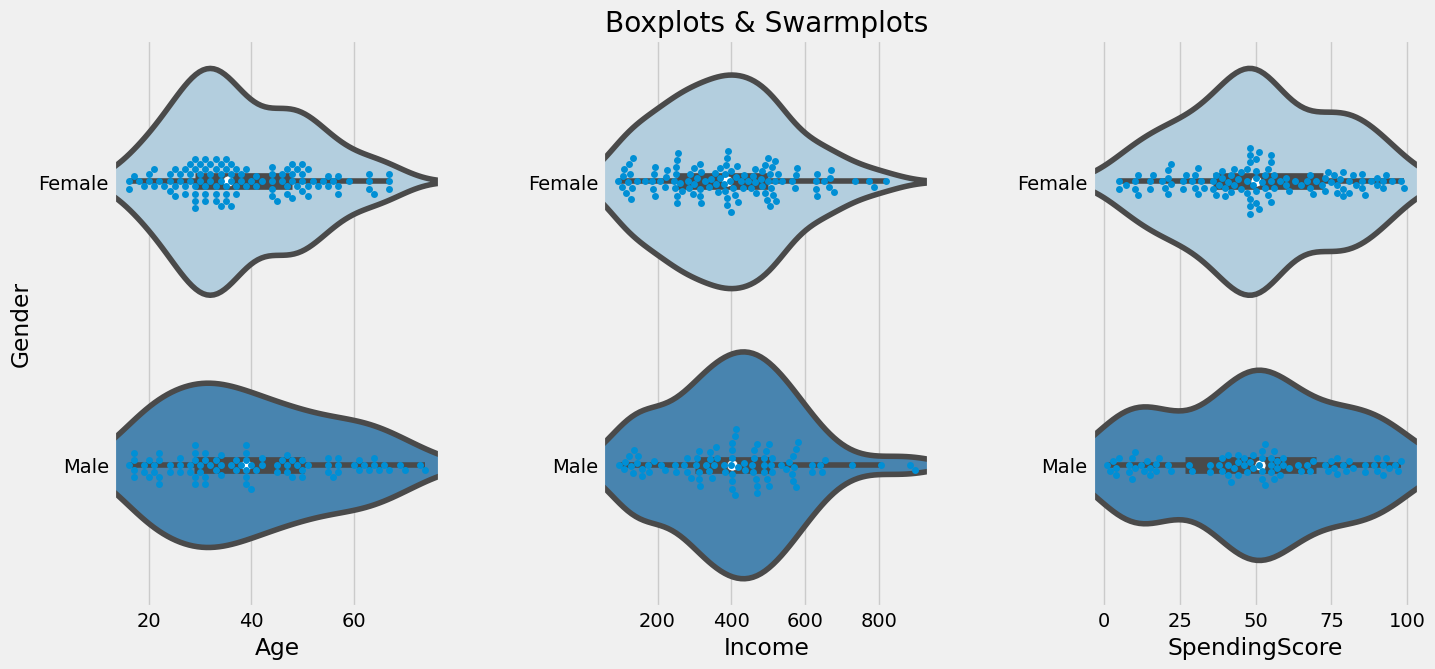

In [50]:
plt.figure(1 , figsize = (15 , 7))
n = 0 

for cols in ['Age' , 'Income' , 'SpendingScore']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = customer, palette='Blues')
    sns.swarmplot(x = cols , y = 'Gender' , data = customer)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

**Findings**
  - In terms of age: the distribution of men is relatively even, and there are more in their 20s; the age of women is mostly concentrated in the range of 20+~30+, and they are generally younger
  - In terms of Income: Man's income is higher than female's

# Preprocessing
 - Before use the K means to cluster, it needs to scale the variables and to look at a scatter plot or data table to estimate the number of cluster centers to set for the k parameter in the model

## Process the Categorical Data
  - converting the categorical variable "Gender" into a numerical variable

In [51]:
gender={'Male':0,'Female':1}
df=customer.copy()
df['Gender']=df['Gender'].map(gender)
print(df.head)

<bound method NDFrame.head of      CustomerID  Gender  Age  Income  SpendingScore
0             1       1   29     499             85
1             2       1   21     208             81
2             3       1   27     300             48
3             4       1   26     458             29
4             5       0   57     221              4
..          ...     ...  ...     ...            ...
195         196       1   35     677             26
196         197       0   21     128             77
197         198       1   44     318             48
198         199       1   29     386             45
199         200       1   46     355             47

[200 rows x 5 columns]>


# Multivariate Analysis
- Use the heatmap to show the correlation among the four attributes

<Axes: >

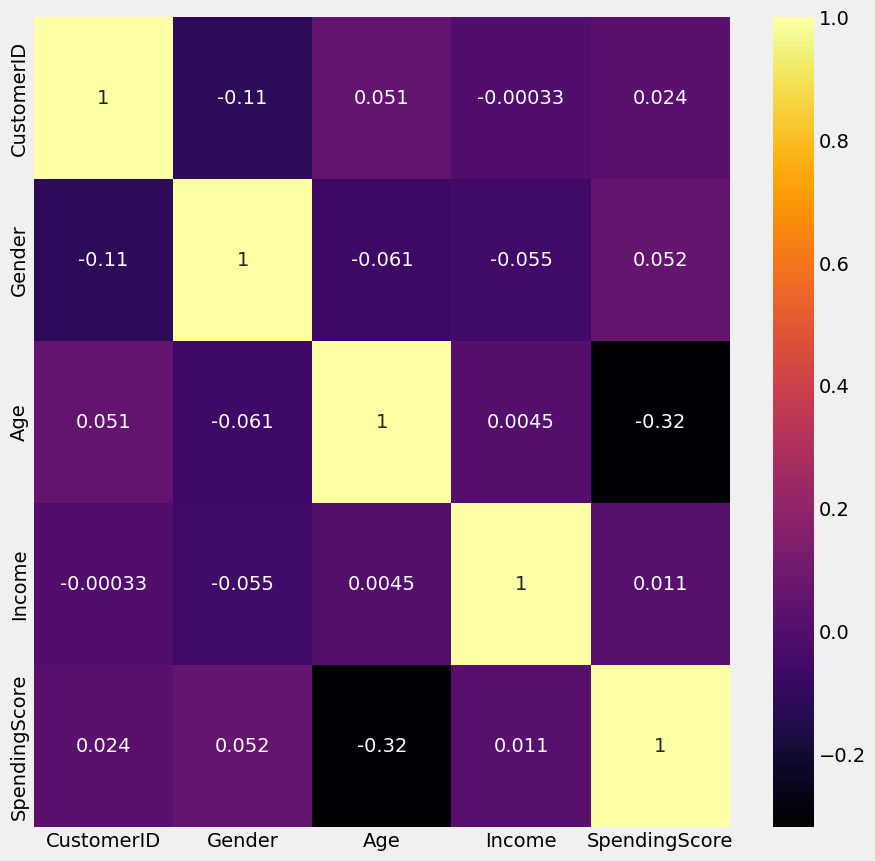

In [52]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(), annot=True, cmap='inferno')

**Finding**
  - `Age` is negatively correlated with `SpendingScore`, corr score is -0.32
  - other three attributes seems to have little correlated

# Scale the Data Before Building the Model

In [53]:
from sklearn.preprocessing import StandardScaler
# Scale the numerical columns
scaler = StandardScaler()
df[['Age', 'Income', 'SpendingScore']] = scaler.fit_transform(df[['Age', 'Income', 'SpendingScore']])

# First Clustering Model Based on Age and SpendingScore

In [54]:
'''Age and spending Score'''
df1 = df[['Age' , 'SpendingScore']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    km1 =(KMeans(n_clusters = n , # define the cluster numbers
                  init='k-means++', #inital centroid
                  n_init = 10 , #default is 10
                  max_iter=300, #max iteration times defined to be 300
                  tol=0.0001, #Tolerance minimum error 
                  random_state= 42 , #define the random_state to 42
                  algorithm='elkan'#Using elkan K-Means algorithm
            ) )
    km1.fit(df1)
    inertia.append(km1.inertia_)

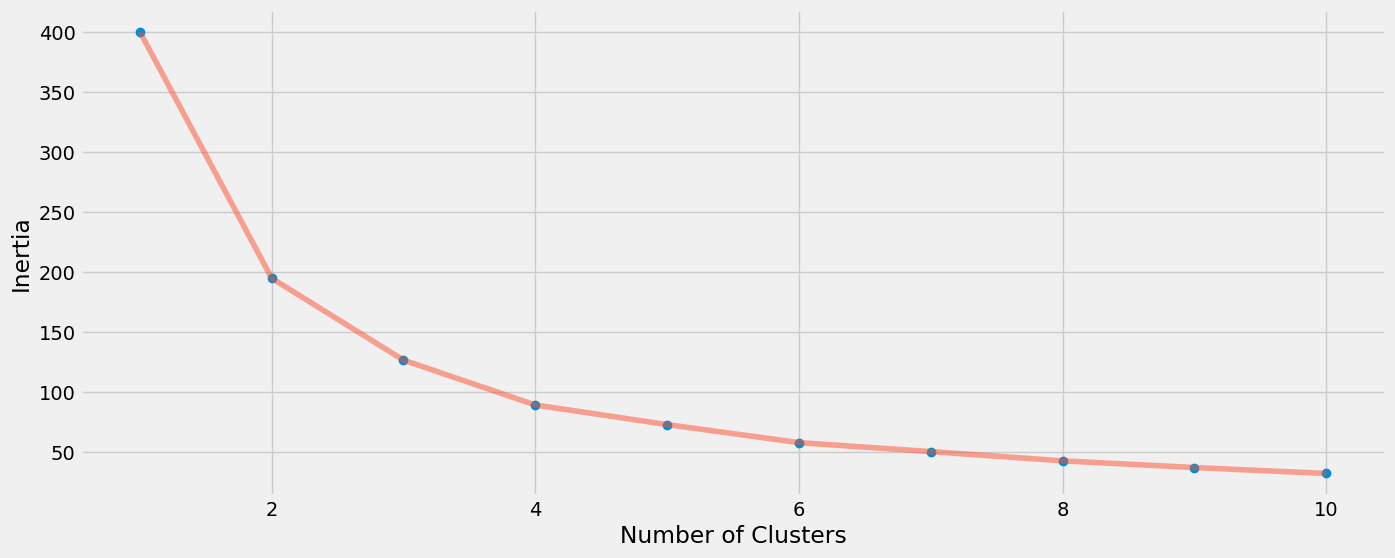

In [55]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

- Through Inertia numbers to define the n_clusters number is 4

In [56]:
km1_best = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 42  , algorithm='elkan') )
km1_best.fit(df1)
labels1 = km1_best.labels_
centroids1 = km1_best.cluster_centers_

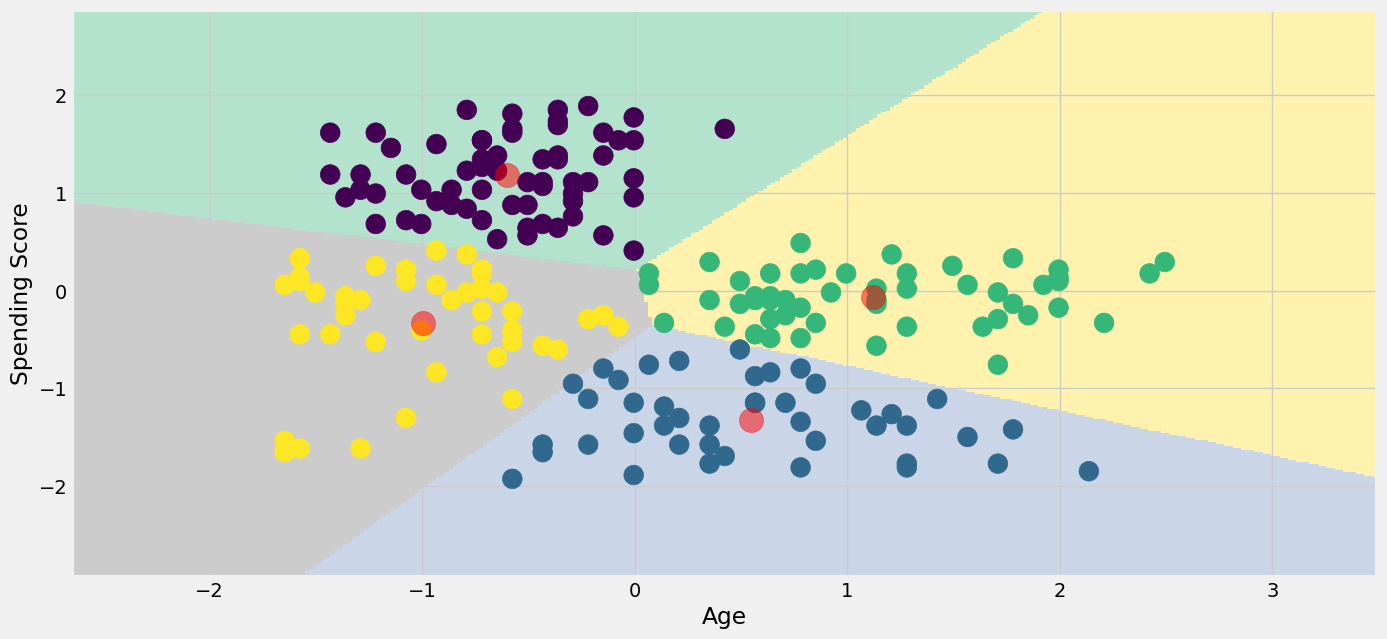

In [57]:
h = 0.02
x_min, x_max = df1[:, 0].min() - 1, df1[:, 0].max() + 1
y_min, y_max = df1[:, 1].min() - 1, df1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = km1_best.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'SpendingScore' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score') , plt.xlabel('Age')
plt.show()

In [58]:
score1 = metrics.silhouette_score(df1,labels1)
print('Four Customer Segmentation based on SpendingScore and Age,Silhouette_score is:' , score1)

Four Customer Segmentation based on SpendingScore and Age,Silhouette_score is: 0.4478725399992516


**Finding**
  - Based on `Age` and `SpendingScore`, Customer can be divided into four customer segmentation
  - The Silhouette score km1_best model( Based on SpendingScore and Age, n_clusters=4) is 0.45
  - The effect of km1_best_model is good

In [59]:
customer['cluster_1']=km1_best.labels_
# Calculate the mean values of the variables in each cluster
customer.groupby('cluster_1').mean()

,CustomerID,Age,Income,SpendingScore
cluster_1,,,,
0,101.666667,30.634921,415.984127,80.873016
1,98.976744,46.720930,429.348837,16.418605
2,102.058824,54.803922,357.745098,48.843137
3,98.465116,25.139535,367.720930,41.930233


**Business Insights on the first model**
  - Based on the Age and SpendingScore two attributes, customers can be divided into four segments
  - Group 0 is Young People but with High Spending Score
  - Group 1 is Middle Aged People with Low Spending Score
  - Group 2 is Old People with medium Spending Score
  - Group 3 is Young People with Low Spending Score
  - **For Group 0 Young people with High Spending Score, they are compulsory customers, company should use some new  and trendy products to attract them. For Group 3 Young People with Low Spending Score, company should use more discount method to stimulate purchasing orders. For Group 1&2, they are middle contribution customers, it is important to maintain them.**


# Second Clustering Model Based on Income and SpendingScore

In [60]:
'''Income and spending Score'''
df2 = df[['Income' , 'SpendingScore']].iloc[: , :].values
inertia_2 = []
for n in range(1 , 11):
    km2 =(KMeans(n_clusters = n , # define the cluster numbers
                  init='k-means++', #inital centroid
                  n_init = 10 , #default is 10
                  max_iter=300, #max iteration times defined to be 300
                  tol=0.0001, #Tolerance minimum error 
                  random_state= 42 , #define the random_state to 42
                  algorithm='elkan'#Using elkan K-Means algorithm
            ) )
    km2.fit(df2)
    inertia_2.append(km2.inertia_)

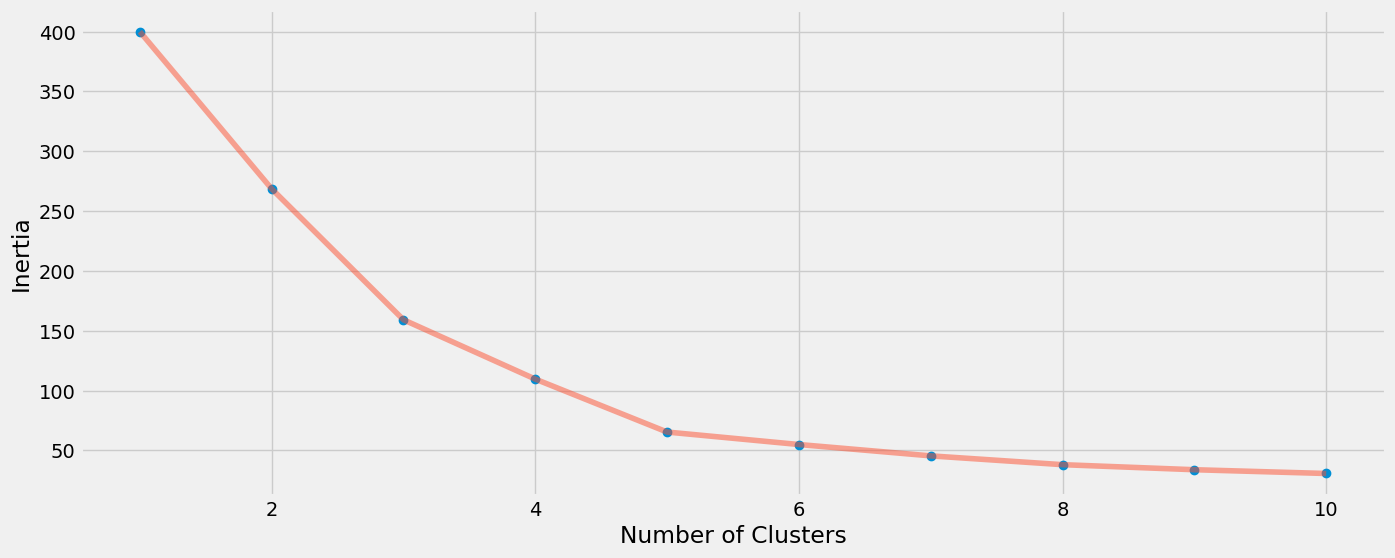

In [61]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia_2 , 'o')
plt.plot(np.arange(1 , 11) , inertia_2 , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

- Through Inertia numbers to define the n_clusters number is 5



In [62]:
km2_best = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 42  , algorithm='elkan') )
km2_best.fit(df2)
labels2 = km2_best.labels_
centroids2 = km2_best.cluster_centers_

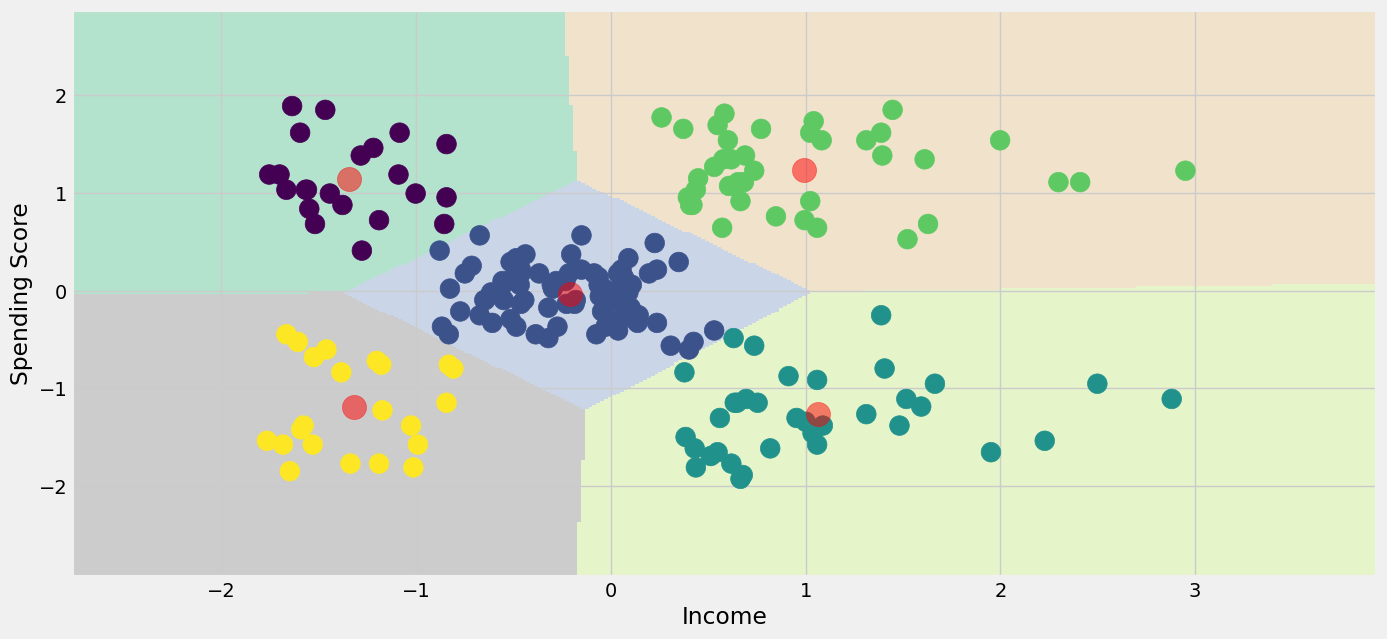

In [63]:
h = 0.02
x_min, x_max = df2[:, 0].min() - 1, df2[:, 0].max() + 1
y_min, y_max = df2[:, 1].min() - 1, df2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = km2_best.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Income' ,y = 'SpendingScore' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score') , plt.xlabel('Income')
plt.show()

In [64]:
score2 = metrics.silhouette_score(df2,labels2)
print('Five Customer Segmentation based on SpendingScore and Income, Silhouette_score is :' , score2)

Five Customer Segmentation based on SpendingScore and Income, Silhouette_score is : 0.5554463554607432


**Finding**
  - Based on `Income` and `SpendingScore`, Customer can be divided into five customer segmentation
  - The Silhouette score km2_best model( Based on `SpendingScore` and `Income`, n_clusters=5) is 0.55
  - The effect of km2 best model is good and better than the model1

In [65]:
customer['cluster_2']=km2_best.labels_
# Calculate the mean values of the variables in each cluster
customer.groupby('cluster_2').mean()

,CustomerID,Age,Income,SpendingScore,cluster_1
cluster_2,,,,,
0,99.272727,26.045455,165.136364,79.818182,0.000000
1,99.560976,42.963415,357.853659,49.524390,2.317073
2,98.885714,41.428571,574.428571,18.000000,1.457143
3,103.820513,33.025641,562.230769,82.282051,0.000000
4,101.909091,44.590909,168.954545,19.954545,1.500000


** Finding**
- Based on the Income and SpendingScore two attributes, customers can be divided into five segments
- Group 0 is Low Income but with High Spending Score
- Group 1 is Middle Income with Middle Spending Score
- Group 2 is High Income with Low Spending Score
- Group 3 is High Income with High Spending Score
- Group 4 is Low Income and with Low Spending Score
- **All High Spending Score customers, companies should launch some marketing method with more high price products to attract people to buy and therefore to increase the company's GMV. In terms of Income features of customers, the most important considerations is the company’s ATV(Average Transaction Value)**



# Third Clustering Model Based on Income and SpendingScore and Age

In [66]:
# select the three attributes to feed the model

'''Income and spending Score'''
df3=df[['Age','Income','SpendingScore']].iloc[: , :].values
inertia_3 = []
for n in range(1 , 11):
    km3 =(KMeans(n_clusters = n , # define the cluster numbers
                  init='k-means++', #inital centroid
                  n_init = 10 , #default is 10
                  max_iter=300, #max iteration times defined to be 300
                  tol=0.0001, #Tolerance minimum error 
                  random_state= 42 , #define the random_state to 42
                  algorithm='elkan'#Using elkan K-Means algorithm
            ) )
    km3.fit(df3)
    inertia_3.append(km3.inertia_)

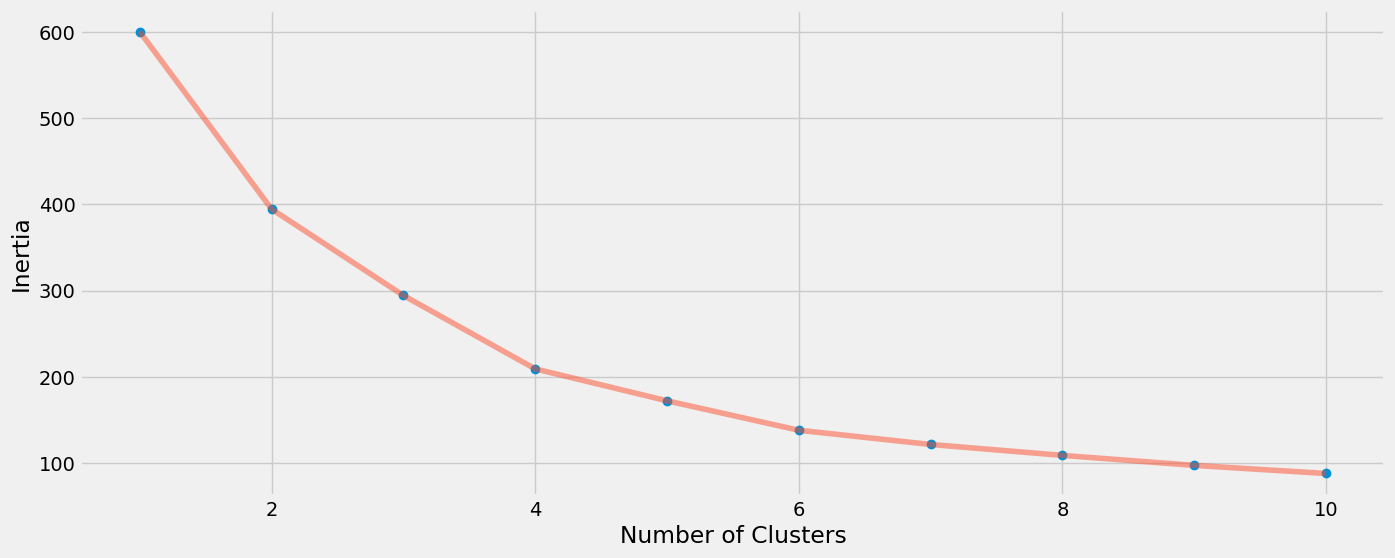

In [67]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia_3 , 'o')
plt.plot(np.arange(1 , 11) , inertia_3 , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

- Through Inertia numbers to define the n_clusters number is 6


In [68]:
km3_best = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 42  , algorithm='elkan') )
km3_best.fit(df3)
labels3 = km3_best.labels_
centroids3 = km3_best.cluster_centers_

## Reduce the Dimension


<Axes: xlabel='col1', ylabel='col2'>

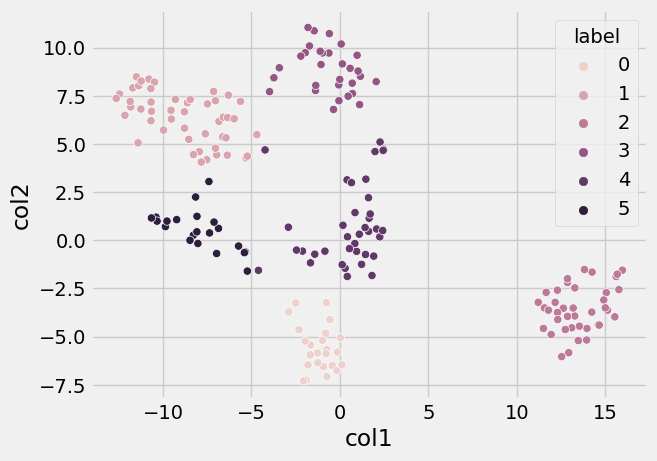

In [69]:
from sklearn import manifold 
tsne = manifold.TSNE()   #Reduce relational data to two dimensions
tsne_data = tsne.fit_transform(df3)
tsne_df = pd.DataFrame(tsne_data,columns=['col1','col2'])
tsne_df.loc[:,'label']=km3_best.predict(df3)
sns.scatterplot(x = 'col1',y='col2',hue='label',data=tsne_df)

In [70]:
score_3 = metrics.silhouette_score(df3,tsne_df.loc[:,'label'])
print('Six Customer Segmentation based on SpendingScore and Income and Age, Silhouette_score is :' , score_3)


Six Customer Segmentation based on SpendingScore and Income and Age, Silhouette_score is : 0.43344394895963534


**Finding**
  - Based on `Income` and `SpendingScore` and `Age`, Customer can be divided into six customer segmentation
  - The Silhouette score km3_best model( Based on `SpendingScore` and `Income` and `Age`, n_clusters=6) is 0.43

Through dimensionality reduction, the three-dimensional stereogram is reduced to a plane diagram. The 6 different colors in the above picture represent 6 different groups of people. Because K-Means is unsupervised learning, it is mainly responsible for classifying users with obvious characteristics into one category. Specifically, each We need to analyze what groups each class represents, which will be described below.

## Cluster Customer Analysis


In [71]:
cluster_centers=km3_best.cluster_centers_
cluster_centers_original=scaler.inverse_transform(cluster_centers)
cluster_centers_original

array([[ 26.5       , 173.16666667,  78.41666667],
       [ 55.10416667, 353.72916667,  49.5       ],
       [ 33.02564103, 562.23076923,  82.28205128],
       [ 44.90322581, 584.93548387,  19.12903226],
       [ 24.54054054, 376.48648649,  43.91891892],
       [ 45.04761905, 171.47619048,  19.52380952]])

<Axes: >

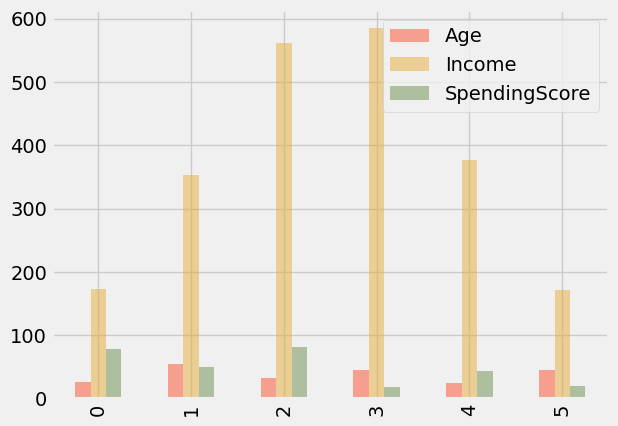

In [72]:
result = pd.DataFrame(data=cluster_centers_original,
          columns = ['Age','Income','SpendingScore']).reset_index(drop= True)
result.plot(kind='bar',color=['C1','C2','C3'],clip_on=False,alpha = 0.5)

## Interpretation of Customer Segmentation Analysis


In [73]:
#Add the obtained cluster labels to the original data set
customer['cluster']=km3_best.labels_
# Calculate the mean values of the variables in each cluster
customer.groupby('cluster').mean()

,CustomerID,Age,Income,SpendingScore,cluster_1,cluster_2
cluster,,,,,,
0,100.291667,26.500000,173.166667,78.416667,0.125000,0.083333
1,101.437500,55.104167,353.729167,49.500000,2.000000,1.062500
2,103.820513,33.025641,562.230769,82.282051,0.000000,3.000000
3,104.774194,44.903226,584.935484,19.129032,1.193548,1.967742
4,95.459459,24.540541,376.486486,43.918919,2.918919,1.216216
5,95.000000,45.047619,171.476190,19.523810,1.428571,3.857143


## Customer Segmentation Analysis
- **Group 0 is Impulse Consumers**: Average age is 27 years old, Income 173, SpendingScore is 78. This is mainly young people with average income but high consumption score
- **Group 1 is Important to Keep Consumers**: Average age is 55 years old, Income 354, SpendingScore is 50. This is mainly middle-aged and elderly people with middle income and consumption scores 
- **Group 2 is Important Value Consumers**: Average age is 33 years old, Income 562, SpendingScore is 82. This is mainly middle-aged people, with high income and consumption scores, belonging to the **optimal** customer group. 
- **Group 3 is Prudent Consumers** : Average age is 45 years old, Income 585, SpendingScore is 19. This is mainly middle-aged people with high income but low consumption score. 
- **Group 4 is Important Development Consumers** : Average age is 25 years old, Income 376, SpendingScore is 44. This is mainly young people, with middle income and consumption scores, they have great potential.
- **Group 5 is Average Value Consumers** : Average age is 45 years old, Income 171, SpendingScore is 20. This is mainly middle-aged people, but with low income and consumption scores. They are the least valuable customers



In [74]:
labels={0:"Impulse Consumers",1:"Maintenance Consumers",2:"Value Consumers",3:"Prudent Consumers",4:"Development Consumers",5:"Average Consumers"}
customer['cluster']=customer['cluster'].map(labels)

In [75]:
customer['cluster'].value_counts(1)

Maintenance Consumers    0.240
Value Consumers          0.195
Development Consumers    0.185
Prudent Consumers        0.155
Impulse Consumers        0.120
Average Consumers        0.105
Name: cluster, dtype: float64

**Finding**
- Maintenance customer is the biggest customer segmentation, which means the company has the most important to keep the customers.
- Average customer is the least customer segmentaion, which means the company has the least average value consumers

## Recommendation on the marketing plan
- From the statistical view, this company has a relatively stable customer base, and the overall development trend is stable. For future development, it is necessary to formulate different marketing and operation strategies for different groups of people.
- In this report, first use Age and SpendingScore to build a model to divide customers into 4 groups, which mainly focus on the Customers’ Age and Purchasing Power. It is better to choose this segmentation when the company wants to launch  and market some new products.
- Second, use Income and SpendingScore to build a model to divide customers into 5 groups, which mainly focus on the Customers’ Income level and Purchasing Power. It is better to choose this segmentation when the company intends to increase its GMV or Orders performance. This segmentation model  also the highest Silhouette score.
- Third, use Age, Income and SpendingScore to build a model to divide customers into 6 groups, which mainly focus on the customers’ comprehensive profile. It is better to choose this segmentation when the company wants to build a detailed customer profiles to make better user management.
